In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let us load the data into Dataframe and exlpore the columns, we will also do some basic sanity testing to weed out NULL and missing values.

In [2]:
HR_df=pd.read_csv('C:/Users/saliynr/Downloads/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
HR_df.head(5)

HR_df.shape # 1470 rows & 35 columns

HR_df.info() # 35 columns, 26 int & 9 objects, no missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
#Missing data can also be checked using 
HR_df.isnull().sum().sort_values(ascending=False)

#Incase there are missing values and if the percentage is less, those can be dropped using 
HR_df = HR_df.drop(HR_df[HR_df.isnull().any(1)].index, axis = 0)

Get a basic understanding of how all the integer columns are distirbuted and check for potential data integrity issues

In [5]:
HR_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Observations**

- Mean age is 36, people less than 30 only contribute about 25%, shows there are no much young people working here.
- Half of the employees are working in same role since last 3 years, rotation seems to be slower
- EmployeeCount and StandardHours are not so useful columns,can be dropped.As they have only one type of data throughout.

In [6]:
HR_df=HR_df.drop(['EmployeeCount','StandardHours'],axis=1)


In [7]:
# Lets convert Attrition Column into numerical values
predict = {'Yes':1, 'No':0}
# Using lambda function to perform convertion
HR_df["Attrition_num"] = HR_df["Attrition"].apply(lambda n: predict[n])

In [8]:
#Dropping original attrition column
HR_df=HR_df.drop(['Attrition'],axis=1)

In [9]:
HR_df.shape

(1470, 33)

0    1233
1     237
Name: Attrition_num, dtype: int64


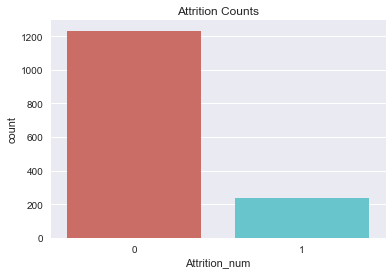

In [10]:
#Check the target variable counts and plot the same

print(HR_df['Attrition_num'].value_counts())

sns.countplot(x='Attrition_num',data=HR_df, palette='hls')
plt.title('Attrition Counts')
plt.savefig('C:/Users/saliynr/Downloads/ibm-hr-analytics-employee-attrition-performance/count_plot.png',transparent=True,bbox_inches='tight',dpi=300)

plt.show()

Let's understand how these two classes affect other features

In [12]:
#HR_df.groupby('Department').Attrition.value_counts().unstack().fillna(0)
HR_df.groupby('Department').Attrition_num.value_counts(normalize=True).unstack().fillna(0) * 100 #-- To see the values in percentage


Attrition_num,0,1
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [13]:
HR_df.groupby('Gender').Attrition_num.value_counts(normalize=True).unstack().fillna(0)

Attrition_num,0,1
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068


- Looks like Sales department has a highest attrition, followed by HR.
- Attrition does not seem to be impacted based on Gender

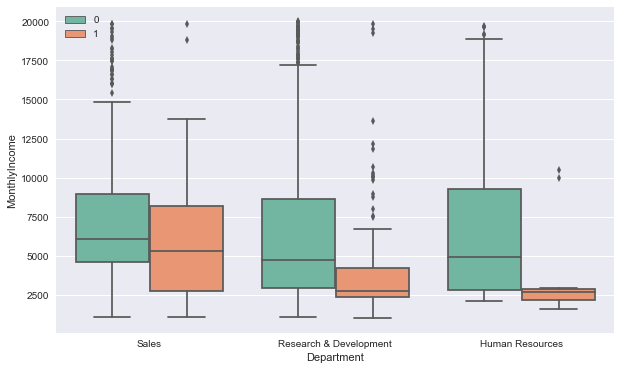

In [14]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x = 'Department',y = 'MonthlyIncome',data=HR_df, hue='Attrition_num',palette='Set2')
plt.legend(loc='upper left')
plt.show()

- HRs who are quitting are receiving very less salary, same applies to R&D, but the gap in HR dept is huge.  

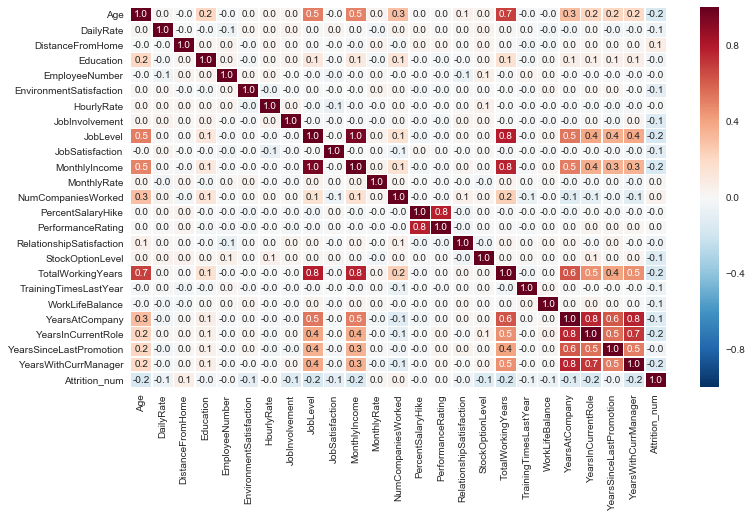

In [15]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(12, 7))
sns.heatmap(HR_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [16]:
#Dropping JobLevel as it is highly correlated with many features
HR_df=HR_df.drop(['JobLevel'],axis=1)  

In [17]:
object_col=list(HR_df.select_dtypes(include=['object']).columns)

object_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

For learning different types of encoding techniques, lets encode 
1. BusinessTravel to LabelEncoding
2. Rest all through oneHotEncoding

In [18]:
#Here they will be encoded as 0,1 & 2 respectively

# Change the type of the "BusinessTravel" column to categorical
HR_df.BusinessTravel = HR_df.BusinessTravel.astype('category')

# Provide the correct order of categories
HR_df.BusinessTravel = HR_df.BusinessTravel.cat.reorder_categories(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'])

# Encode categories
HR_df.BusinessTravel = HR_df.BusinessTravel.cat.codes

In [19]:
object_col=object_col.remove('BusinessTravel')

In [24]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null int8
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
Over18                      1470 non-null object
OverTime                

In [20]:
df_dum = pd.get_dummies( HR_df, columns = object_col,drop_first=True)

In [21]:
df_dum.sample(3)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
84,34,2,1153,1,2,110,1,94,3,2,...,0,0,1,0,0,0,0,1,0,0
781,26,2,192,1,2,1083,1,59,2,1,...,1,0,0,0,0,0,0,1,0,0
54,26,2,1443,23,3,72,3,47,2,4,...,0,0,0,0,0,1,0,1,0,1


In [22]:

X= df_dum.iloc[:,df_dum.columns!='Attrition_num']
y = df_dum['Attrition_num'].values

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [48]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print ('Accuracy :' )
print(accuracy_score(y_pred,y_test))

Accuracy :
0.861678004535


In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.98      0.92       366
          1       0.73      0.29      0.42        75

avg / total       0.85      0.86      0.84       441

[[358   8]
 [ 53  22]]


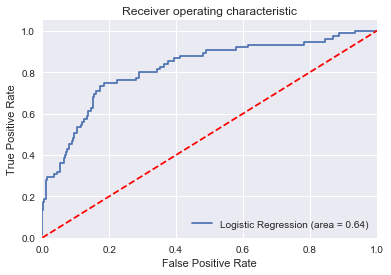

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Cross Validation

In [68]:
from sklearn.cross_validation import cross_val_score
cv_score = cross_val_score(lr,X_train,y_train,cv=10,scoring='roc_auc')
print(cv_score)
print(np.mean(cv_score))

[ 0.86525538  0.84375     0.85987903  0.78285908  0.85738482  0.78556911
  0.83536585  0.74549311  0.85542595  0.82361258]
0.825459490701


# GridSearchCV

Like the alpha parameter of lasso and ridge regularization, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

In [69]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

from sklearn.model_selection import GridSearchCV

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid, cv=4)

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 31.622776601683793, 'penalty': 'l2'}
Best score is 0.8794946550048591


# SMOTE - (Synthetic Minority Oversampling Technique)

 At a high level, SMOTE creates synthetic observations of the minority class by:

1.Finding the k-nearest-neighbors for minority class observations (finding similar observations).

2.Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

In [2]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)


NameError: name 'x_train' is not defined

In [1]:
from imblearn.over_sampling import SMOTE